In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def create_line_graph_popularity(name,country,date,player_search,country_search):

    correlation = np.corrcoef(country_search,player_search)[0,1]

    fig,ax1 = plt.subplots(figsize=(12,8))
    

    line1 = ax1.plot(date,player_search, linestyle='-', color='black', label=f"{name}'s search")
    plt.xticks(rotation=90)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel(f"{name}'s search", color='black', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='black')


    line2 = ax1.plot(date,country_search, linestyle='-', color='red', label=f"{country}'s searc")

    ax1.set_ylabel('Country searched chess',fontsize=12, color='red')


    plt.title(f"{name}'s popularity graph ")
    plt.grid(alpha=0.1)

    plt.text(200,50,f"Correlation: {correlation:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    #ax1.annotate('Major Tournament', xy=(2, 2300), xytext=(2, 2350),arrowprops=dict(facecolor='black', arrowstyle='->'),fontsize=10)

    labels = [f"{name}'s search","player trendline",f"{country}'s search","country trendline"]

In [2]:
import sqlite3
def player_info_returner(name,country_code):
    conn = sqlite3.connect("../data/chess.db")
    cursor = conn.cursor()


    country = cursor.execute(f"SELECT date, search_rate FROM country_gtrends WHERE country = '{country_code}'").fetchall()
    player = cursor.execute(f"SELECT date, search_rate FROM players_gtrends WHERE name='{name}'").fetchall()

    dates = [date[0] for date in country]
    country_search=[rate[1] for rate in country]
    player_search=[rate[1] for rate in player[:-1]]

    conn.close()
    return dates,country_search,player_search

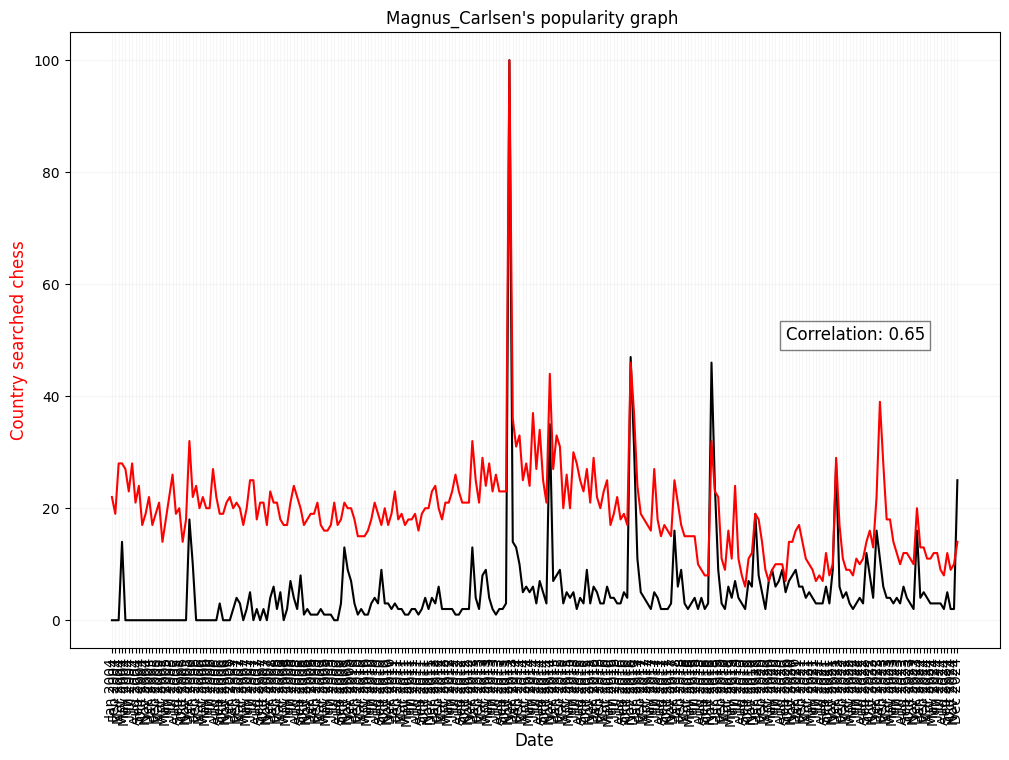

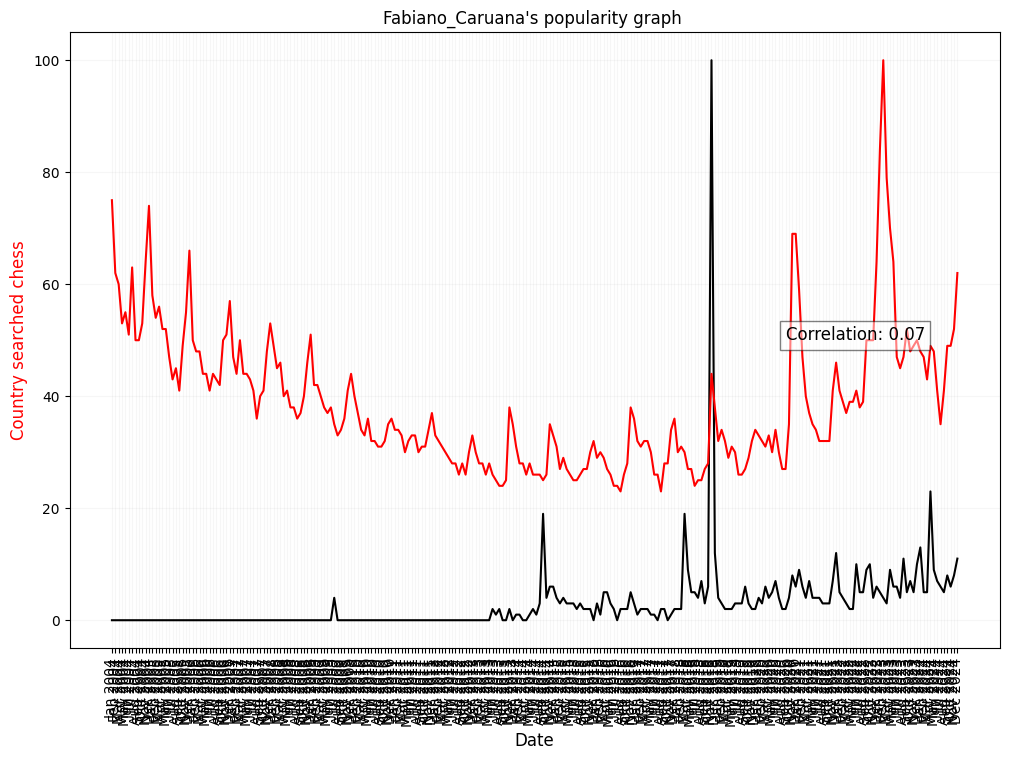

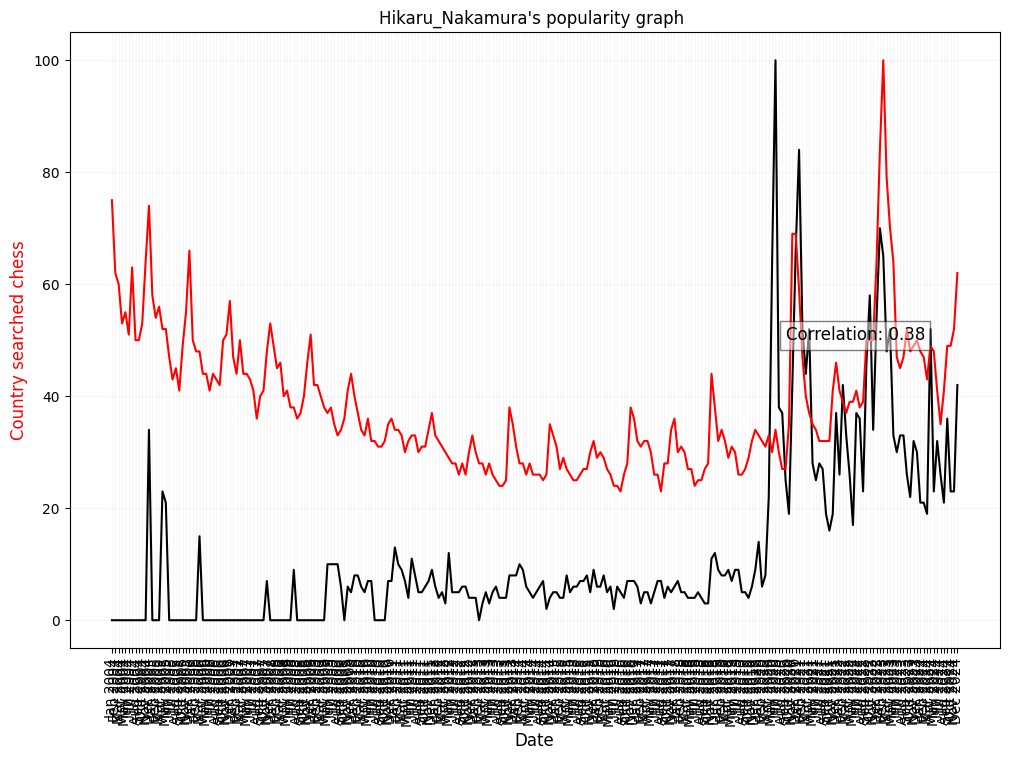

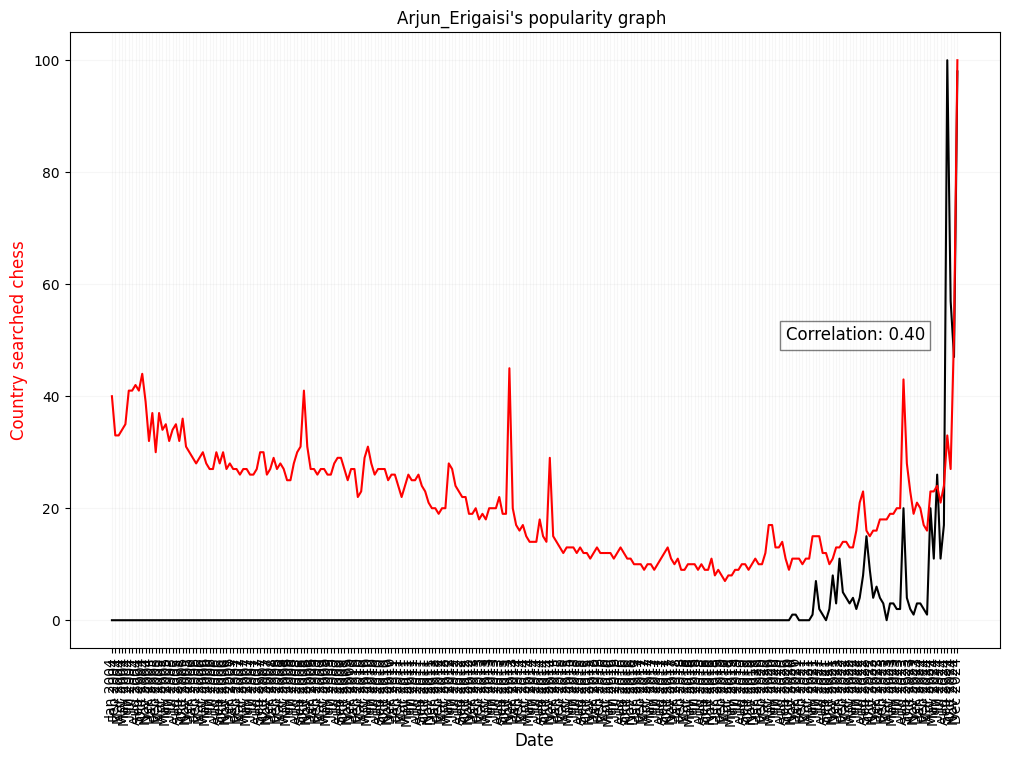

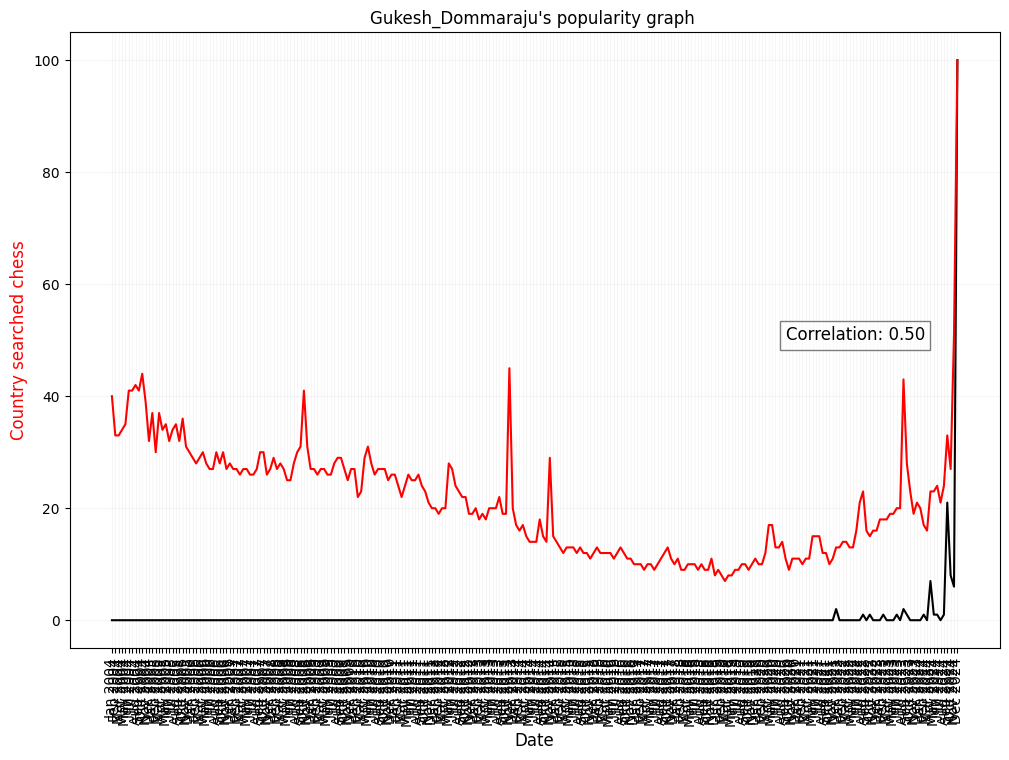

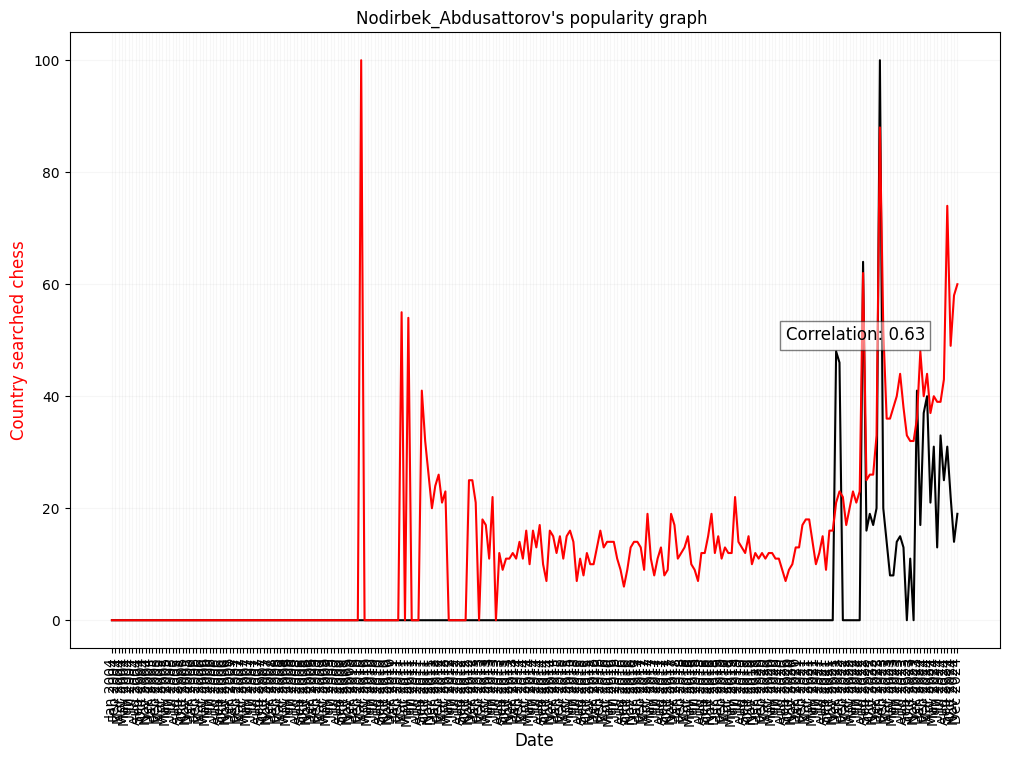

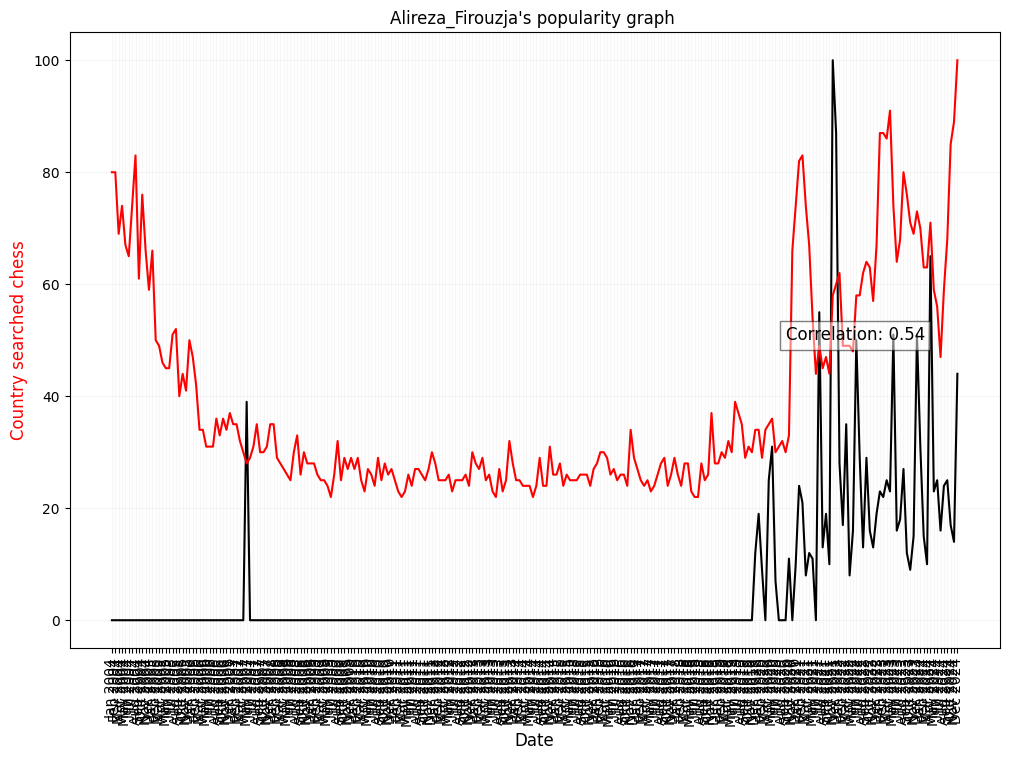

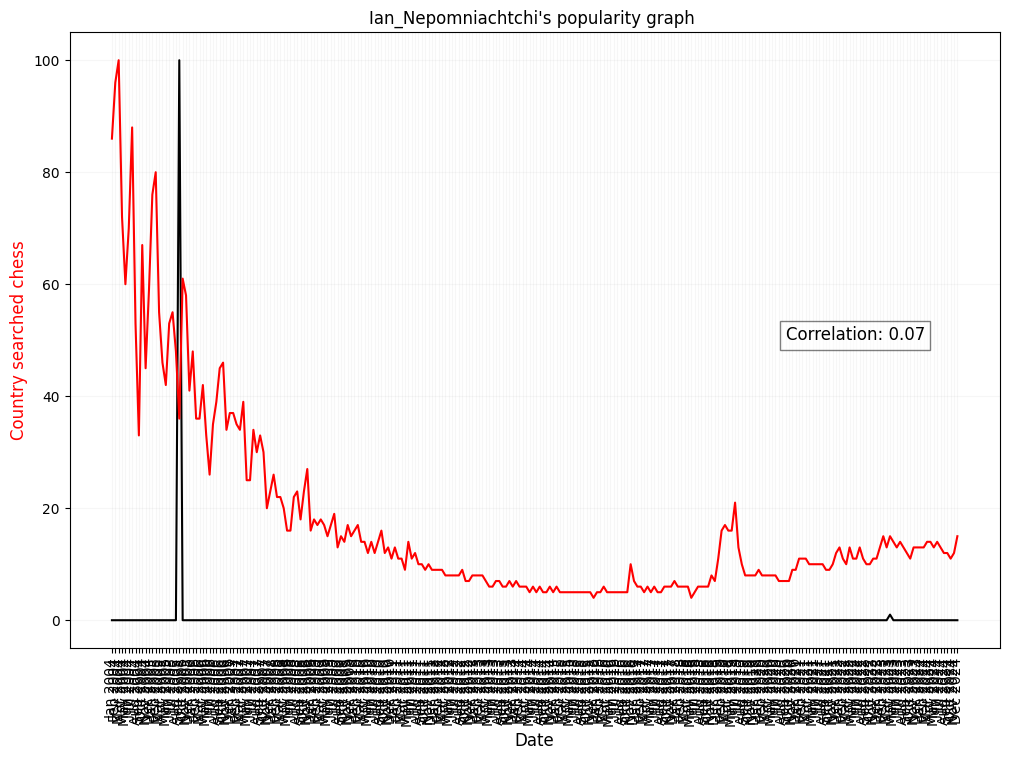

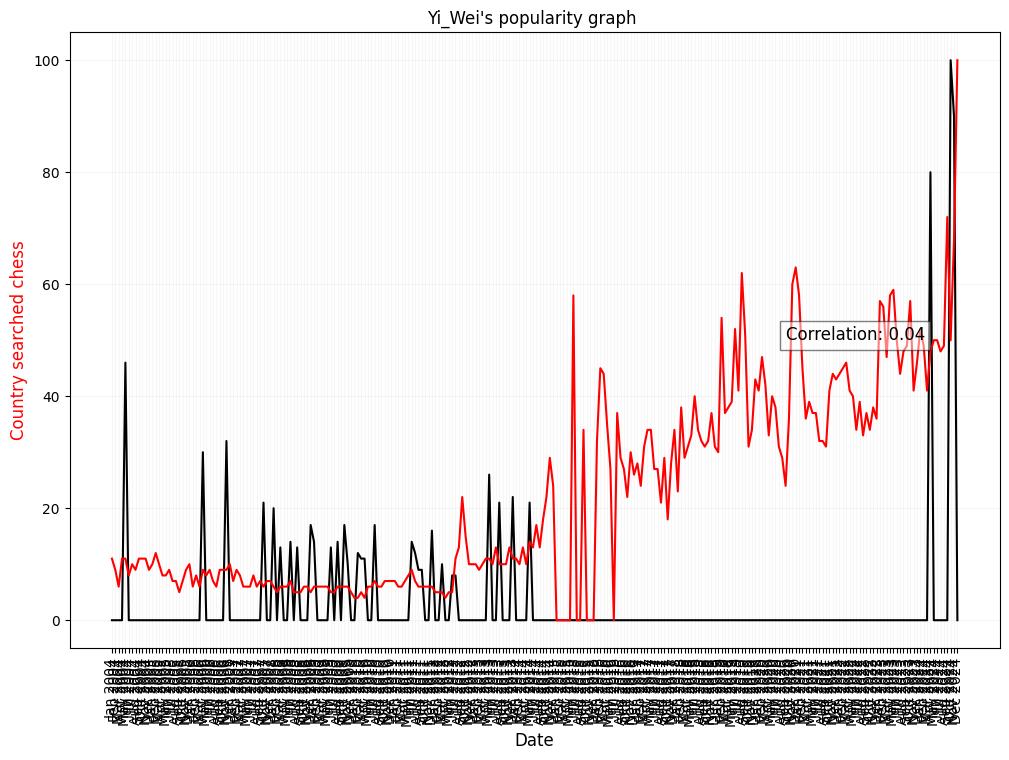

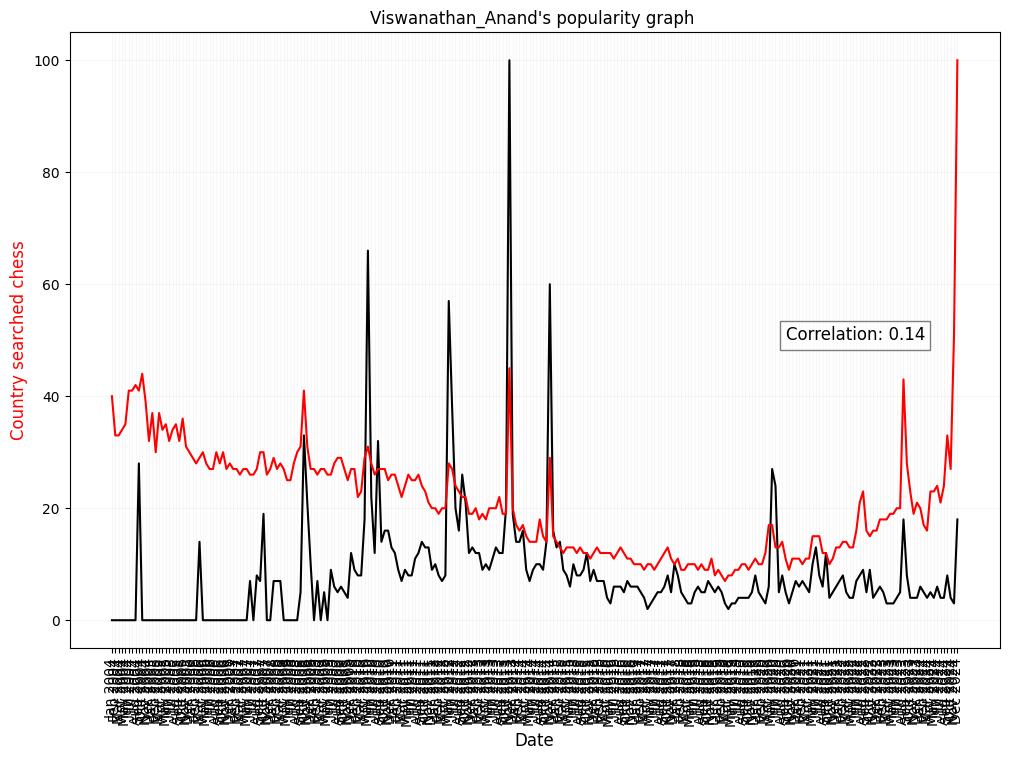

In [4]:
top_players =[
    {'name': 'Magnus_Carlsen','country':'NO','country_name':'Norway'},
    {'name': 'Fabiano_Caruana','country':'US','country_name':'United States of America'},
    {'name': 'Hikaru_Nakamura','country':'US','country_name':'United States of America'},
    {'name': 'Arjun_Erigaisi','country':'IN','country_name':'India'},
    {'name': 'Gukesh_Dommaraju','country':'IN','country_name':'India'},
    {'name': 'Nodirbek_Abdusattorov','country':'UZ','country_name':'Uzbekistan'},
    {'name': 'Alireza_Firouzja','country':'FR','country_name':'France'},
    {'name': 'Ian_Nepomniachtchi','country':'RU','country_name':'Russia'},
    {'name': 'Yi_Wei','country':'CN','country_name':'China'},
    {'name': 'Viswanathan_Anand','country':'IN','country_name':'India'}
]
for players in top_players:
    date,country_search,player_search = player_info_returner(players['name'].replace('_', ' '),players['country'])
    print
    create_line_graph_popularity(players["name"],players["country_name"],date,player_search,country_search)